In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__61_COMPLETE.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,7,1.5,1,10,0.05,0,2.776316,2.750000,0.000000,0.000000,0.310417,0.0625,0.00000,0.000000,15
1,1,1.5,1,10,0.05,0,2.631579,2.500000,0.000000,0.000000,0.347917,0.0875,0.00000,0.000000,19
2,4,1.5,1,10,0.05,0,2.605263,3.000000,0.000000,0.000000,0.304167,0.0125,0.00000,0.000000,13
3,6,1.5,1,10,0.15,0,2.808824,2.333333,0.029167,0.000000,0.257500,0.1125,0.00000,0.000000,17
4,12,1.5,1,40,0.15,0,1.882353,2.250000,0.037500,0.000000,0.341667,0.0125,0.00000,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,162,5.5,5,40,0.15,86,2.852941,3.166667,0.710870,1.570570,0.649599,22.5375,1.31844,1.077992,1357
14738,162,5.5,5,40,0.15,87,3.250000,3.583333,0.713088,1.567405,0.651124,22.4125,0.99344,0.765492,1367
14739,162,5.5,5,40,0.15,88,2.764706,3.250000,0.713999,1.564557,0.652444,22.3000,0.73094,1.102992,1376
14740,162,5.5,5,40,0.15,89,2.867647,2.833333,0.714271,1.562342,0.653467,22.2125,0.61844,0.627992,1383


In [4]:
df_move=df4.groupby(['frac-providers','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.349172        2.481481      0.174172  0.000000   
               1         2.701511        2.833333      0.248273  0.200100   
               2         2.792398        2.828704      0.282489  0.474162   
               3         2.867690        3.027778      0.307111  0.760718   
               4         2.763889        2.935185      0.324519  0.838989   
...                           ...             ...           ...       ...   
0.15           86        2.840414        2.827160      0.510444  1.142387   
               87        2.868736        2.848765      0.510658  1.138766   
               88        2.808279        2.804012      0.511418  1.135982   
               89        2.759804        2.695988      0.511825  1.131845   
               90        2.944444        2.936728      0.512901  1.127526   

                     closeness  betweenness  centroid-x  centroid-y  \
frac-providers step                                                   
0.05           0      0.349740    46.727546    0.000000    0.000000   
               1      0.331149    66.769444   -0.141731    0.069440   
               2      0.318403    71.899306   -0.125170    0.093388   
               3      0.329935    66.756019   -0.151135    0.085817   
               4      0.329320    69.302315   -0.138090    0.106690   
...                        ...          ...         ...         ...   
0.15           86     0.440134    47.402546   -0.083167    0.189189   
               87     0.441387    47.269444   -0.071824    0.178077   
               88     0.442579    47.019444   -0.066732    0.187568   
               89     0.444129    46.876389   -0.082935    0.179003   
               90     0.445704    46.541204   -0.067195    0.190346   

                          links  
frac-providers step              
0.05           0      68.481481  
               1      93.907407  
               2     112.425926  
               3     128.462963  
               4     142.203704  
...                         ...  
0.15           86    523.518519  
               87    526.648148  
               88    529.833333  
               89    533.481481  
               90    537.148148  

[273 rows x 9 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.349172        2.481481      0.174172  0.000000   
               1         2.701511        2.833333      0.248273  0.200100   
               2         2.792398        2.828704      0.282489  0.474162   
               3         2.867690        3.027778      0.307111  0.760718   
               4         2.763889        2.935185      0.324519  0.838989   
...                           ...             ...           ...       ...   
0.15           86        2.840414        2.827160      0.510444  1.142387   
               87        2.868736        2.848765      0.510658  1.138766   
               88        2.808279        2.804012      0.511418  1.135982   
               89        2.759804        2.695988      0.511825  1.131845   
               90        2.944444        2.936728      0.512901  1.127526   

                     closeness  betweenness  centroid-x  centroid-y  \
frac-providers step                                                   
0.05           0      0.349740    46.727546    0.000000    0.000000   
               1      0.331149    66.769444   -0.141731    0.069440   
               2      0.318403    71.899306   -0.125170    0.093388   
               3      0.329935    66.756019   -0.151135    0.085817   
               4      0.329320    69.302315   -0.138090    0.106690   
...                        ...          ...         ...         ...   
0.15           86     0.440134    47.402546   -0.083167    0.189189   
               87     0.441387    47.269444   -0.071824    0.178077   
               88     0.442579    47.019444   -0.066732    0.187568   
               89     0.444129    46.876389   -0.082935    0.179003   
               90     0.445704    46.541204   -0.067195    0.190346   

                          links  total_mood  
frac-providers step                          
0.05           0      68.481481    4.830653  
               1      93.907407    5.534844  
               2     112.425926    5.621101  
               3     128.462963    5.895468  
               4     142.203704    5.699074  
...                         ...         ...  
0.15           86    523.518519    5.667574  
               87    526.648148    5.717502  
               88    529.833333    5.612291  
               89    533.481481    5.455792  
               90    537.148148    5.881173  

[273 rows x 10 columns]

/tmp/ipykernel_59240/2225355652.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


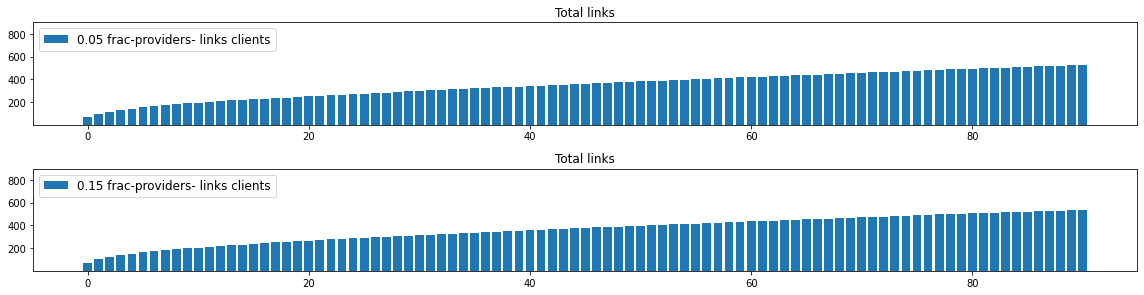

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['links'], label='{} frac-providers- links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

/tmp/ipykernel_59240/61446366.py:14: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


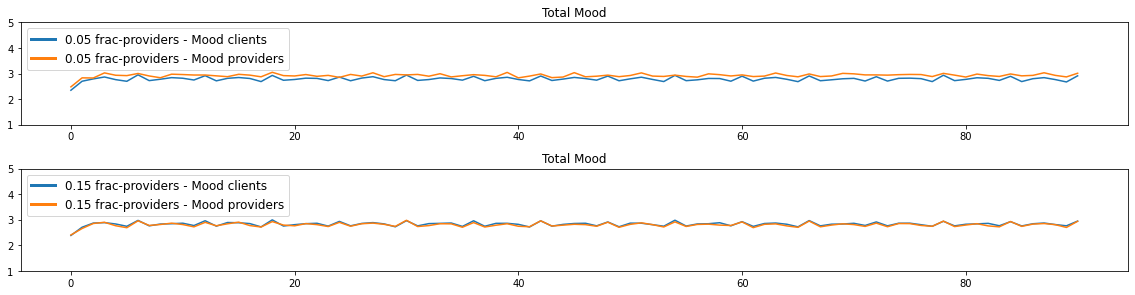

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [ 3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_clients'], label='{} frac-providers - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_providers'], label='{} frac-providers - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



/tmp/ipykernel_59240/2302355802.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


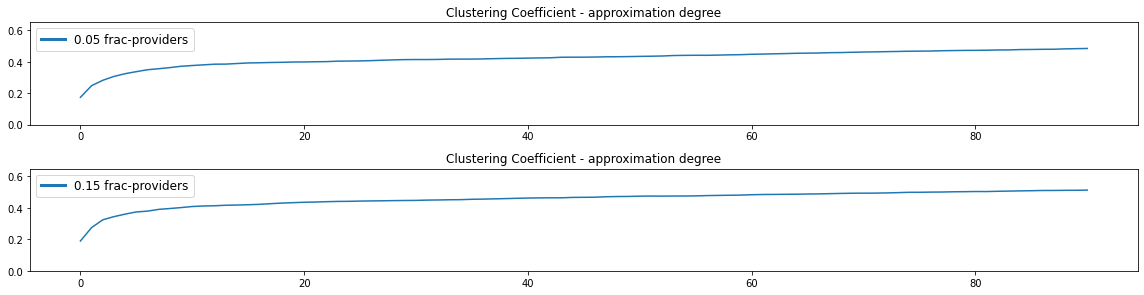

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05, 0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['cluster_coef'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



/tmp/ipykernel_59240/507636111.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


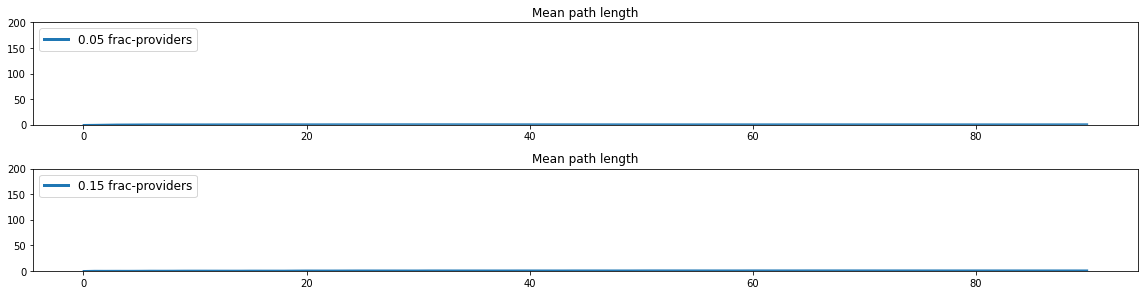

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['paths'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



/tmp/ipykernel_59240/3263416553.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


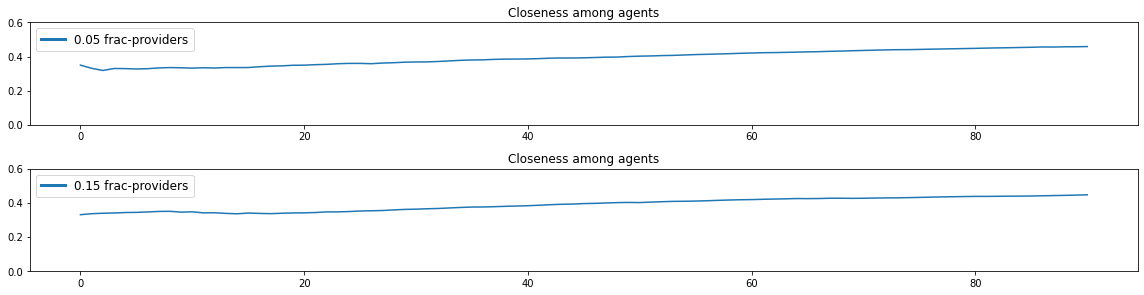

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['closeness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



/tmp/ipykernel_59240/1763840863.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


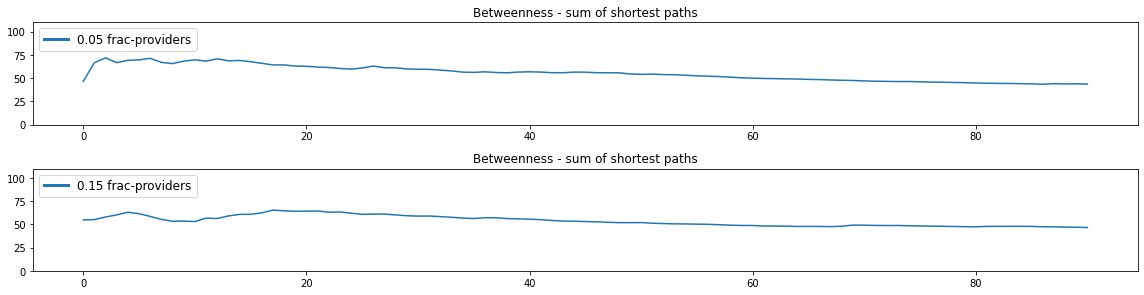

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['betweenness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==5].mean()

In [14]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [15]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-2.7905,0.0058
1,mood_providers,10.9509,0.0
2,cluster_coef,-4.38,0.0
3,paths,3.33,0.0011
4,closeness,0.6942,0.4885
5,betweenness,1.6872,0.0933
6,centroid-x,-4.0778,0.0001
7,centroid-y,-13.9371,0.0
8,links,-0.7926,0.429
9,total_mood,3.942,0.0001


In [16]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,7.7871,0.0058
1,mood_providers,119.9223,0.0
2,cluster_coef,19.1848,0.0
3,paths,11.0886,0.0011
4,closeness,0.4818,0.4885
5,betweenness,2.8466,0.0933
6,centroid-x,16.6284,0.0001
7,centroid-y,194.2429,0.0
8,links,0.6282,0.429
9,total_mood,15.5396,0.0001


In [26]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f','links.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.1686
mood_providers    0.1164
cluster_coef      0.7968
paths            -0.3266
closeness         0.9449
betweenness       0.6788
total_mood        0.2515
centroid-x        0.1866
centroid-y       -0.8276
links             0.9832
dtype: float64

In [28]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f','links.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.0126
mood_providers    0.2923
cluster_coef      0.7977
paths             0.3310
closeness         0.8245
betweenness      -0.1180
total_mood        0.1600
centroid-x       -0.3236
centroid-y        0.5826
links             0.9839
dtype: float64

In [37]:
print(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[60:,2:].shape)

(31, 10)


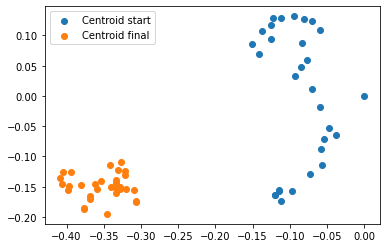

In [38]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

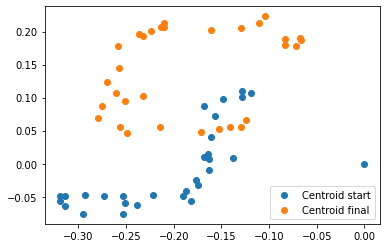

In [39]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [ ]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
frac-providers step                                                       
0.05           0           2.6197          1.6367        0.2287  0.0000   
               1           2.7164          2.4865        0.2988  0.5169   
               2           2.8923          2.6617        0.3328  0.7488   
               3           2.9196          2.6113        0.3555  0.8523   
               4           2.8993          2.5449        0.3682  0.8429   
...                           ...             ...           ...     ...   
0.15           86          2.9391          2.5758        0.5267  0.7397   
               87          3.0374          2.4868        0.5269  0.7384   
               88          2.9725          2.4629        0.5279  0.7371   
               89          2.8605          2.4972        0.5289  0.7355   
               90          3.1166          2.5489        0.5294  0.7341   

                     closeness  betweenness  centroid-x  centroid-y     links  \
frac-providers step                                                             
0.05           0        0.3207      60.3251      0.0000      0.0000   80.1528   
               1        0.2981      63.8339     -0.0678      0.0389  108.8611   
               2        0.3025      68.6611     -0.0738      0.0490  127.7917   
               3        0.3046      70.1090     -0.0959      0.0249  143.6991   
               4        0.3130      68.0946     -0.0936      0.0225  157.3102   
...                        ...          ...         ...         ...       ...   
0.15           86       0.4319      42.6535      0.0941     -0.1118  526.0278   
               87       0.4335      42.4872      0.1253     -0.0868  528.8519   
               88       0.4343      42.4007      0.1143     -0.0757  531.5741   
               89       0.4353      42.2929      0.1143     -0.0620  534.2870   
               90       0.4365      42.1152      0.1075     -0.0506  536.9722   

                     total_mood  
frac-providers step              
0.05           0         4.2565  
               1         5.2030  
               2         5.5539  
               3         5.5310  
               4         5.4442  
...                         ...  
0.15           86        5.5149  
               87        5.5243  
               88        5.4354  
               89        5.3576  
               90        5.6655  

[182 rows x 10 columns]

/tmp/ipykernel_59240/582223609.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


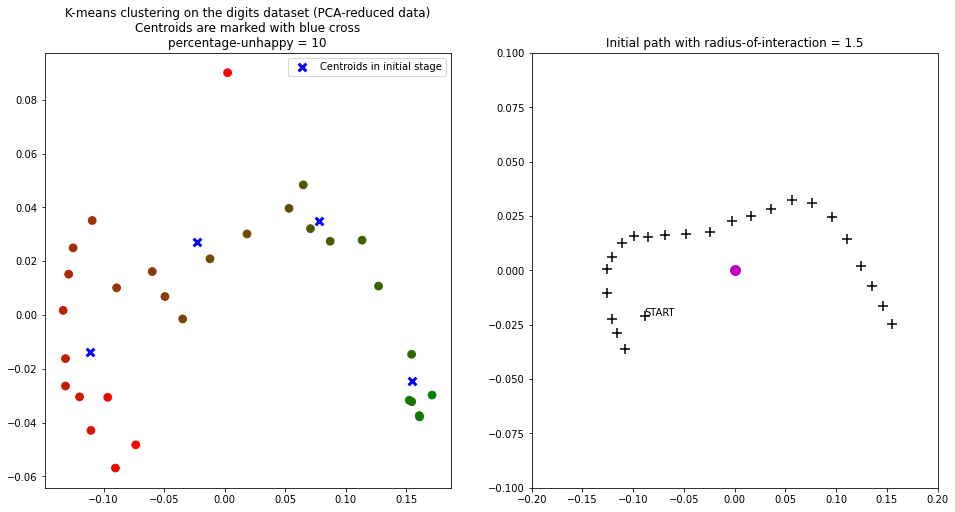

In [41]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].shape

(0, 12)

/tmp/ipykernel_59240/3498061775.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


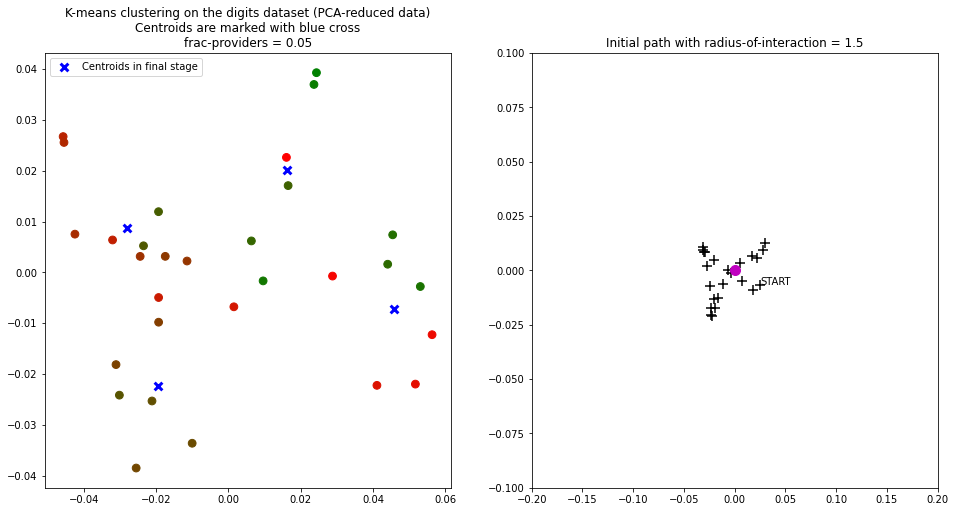

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.05"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [43]:
lag=7


/tmp/ipykernel_59240/4256129613.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


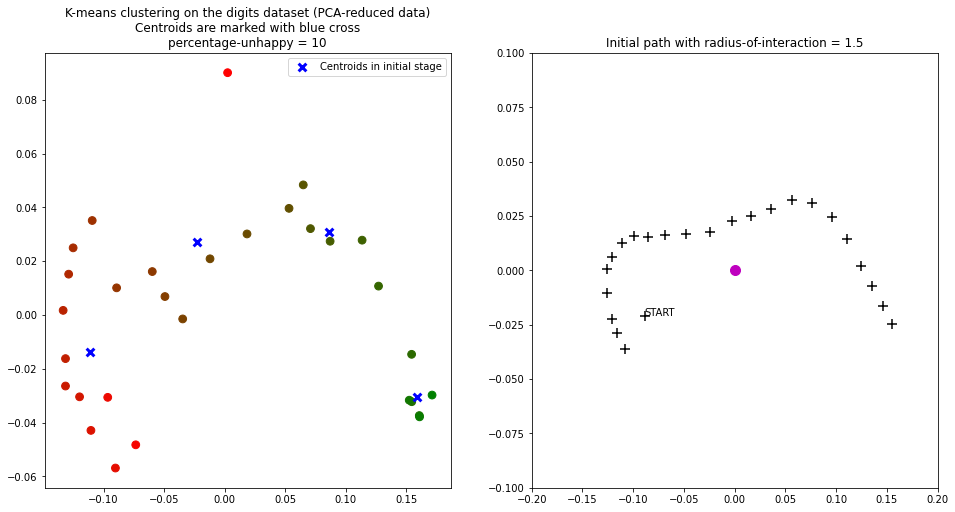

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_59240/4279043870.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


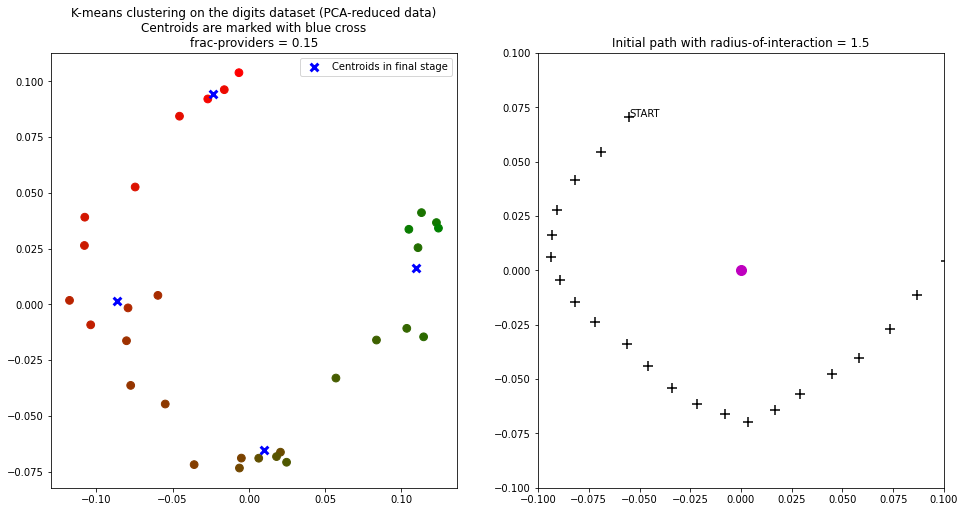

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.15"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()